In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/content/Google_Stock_Price_Test.csv")
data = pd.DataFrame(dataset)

In [ ]:
def perform_eda(data):
  print("Summary Statistics:")
  print(data.describe())
  print("\n Data Types and Missing Values:")
  print(data.info())
  duplicate_rows = data[data.duplicated()]
  if not duplicate_rows.empty:
    print("\n Duplicate Rows:")
    print(duplicate_rows)
    print("\nData Visualization:")
    sns.pairplot(data)
    plt.show()
  correlation_matrix = data.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.show()
  for column in data.columns:
    try:
      data[column] = data[column].astype(float)
      plt.figure(figsize=(8, 6))
      sns.histplot(data[column], kde=True)
      plt.title(f"{column} Distribution")
      plt.show()
      plt.figure(figsize=(8, 6))
      sns.boxplot(data=data[column])
      plt.title(f"{column} Boxplot")
      plt.show()
    except ValueError:
      print(f"Skipping plotting for {column}: Non-numeric values present.")
    categorical_columns = data.select_dtypes(include='object').columns
  for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column)
    plt.title(f"{column} Counts")
    plt.xticks(rotation=45)
    plt.show()

Summary Statistics:
               Date        Open        High         Low       Close  \
count  2.000000e+01   20.000000   20.000000   20.000000   20.000000   
mean   1.484581e+18  807.526000  811.926500  801.949500  807.904500   
std    7.744483e+14   15.125428   14.381198   13.278607   13.210088   
min    1.483402e+18  778.810000  789.630000  775.800000  786.140000   
25%    1.483985e+18  802.965000  806.735000  797.427500  802.282500   
50%    1.484654e+18  806.995000  808.640000  801.530000  806.110000   
75%    1.485238e+18  809.560000  817.097500  804.477500  810.760000   
max    1.485821e+18  837.810000  841.950000  827.010000  835.670000   

             Volume  
count  2.000000e+01  
mean   1.659895e+06  
std    6.774747e+05  
min    9.193000e+05  
25%    1.248500e+06  
50%    1.418050e+06  
75%    1.743400e+06  
max    3.246600e+06  

 Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Co

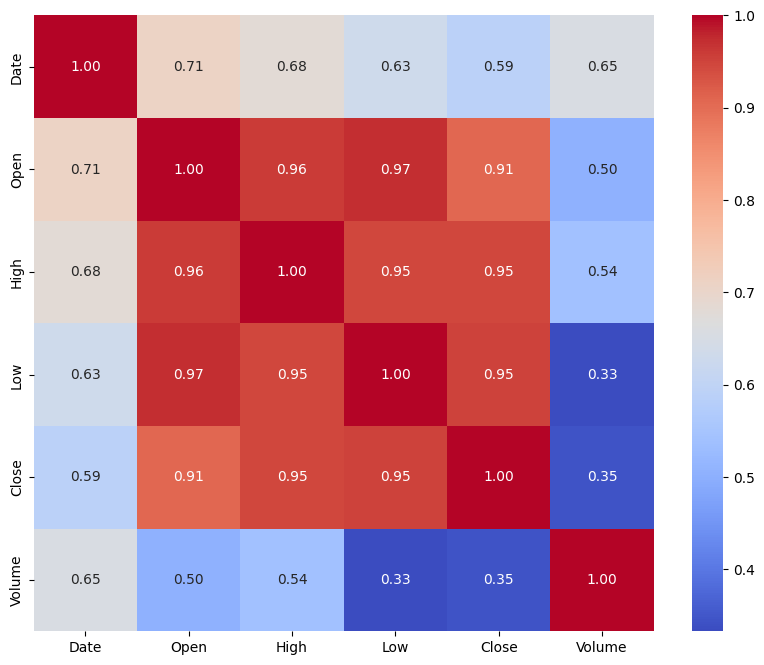

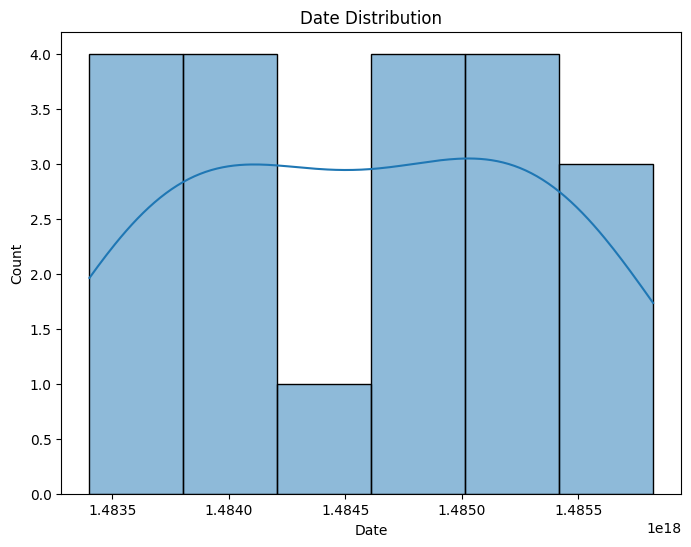

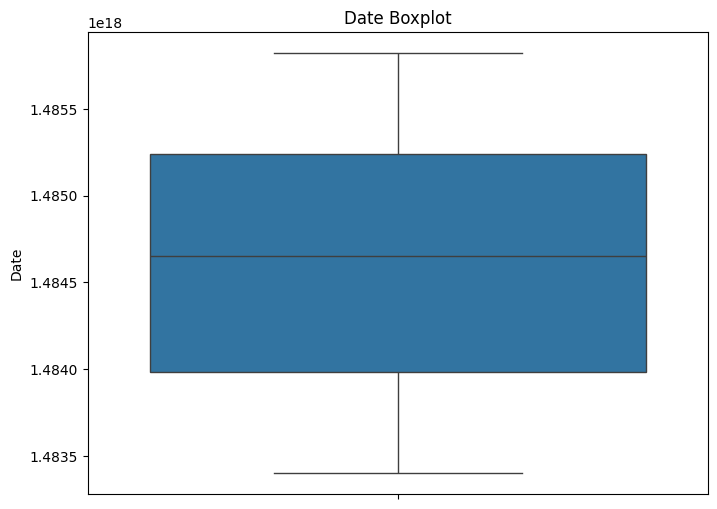

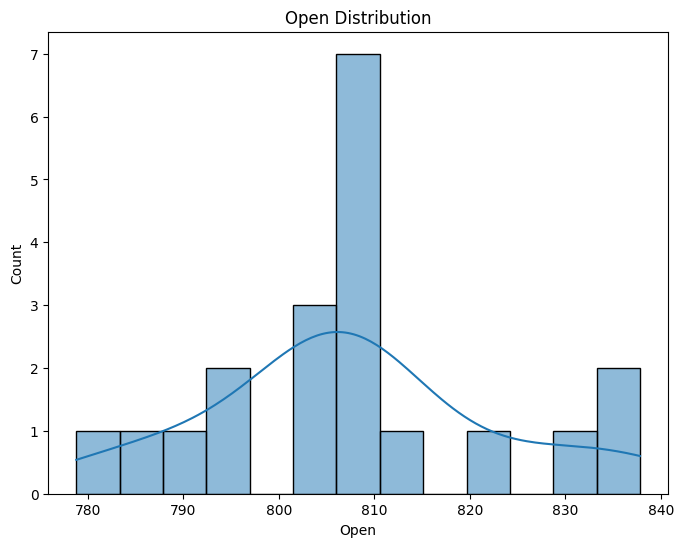

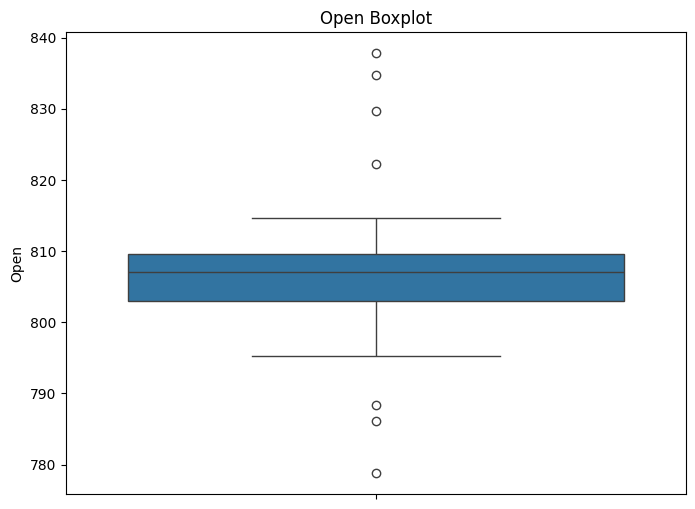

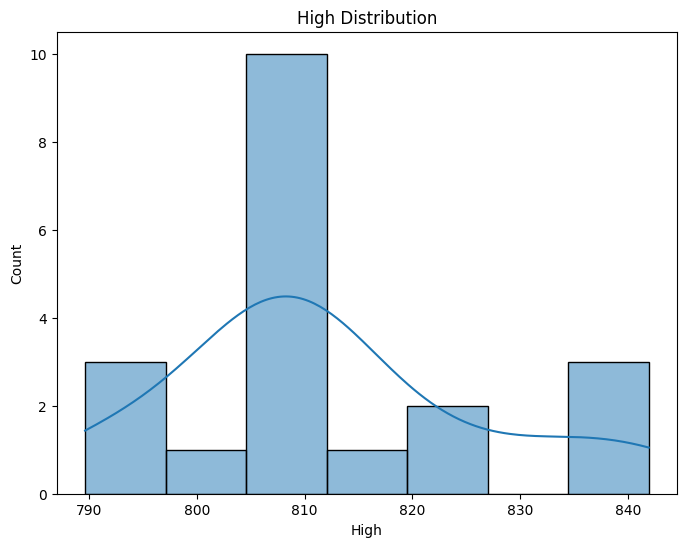

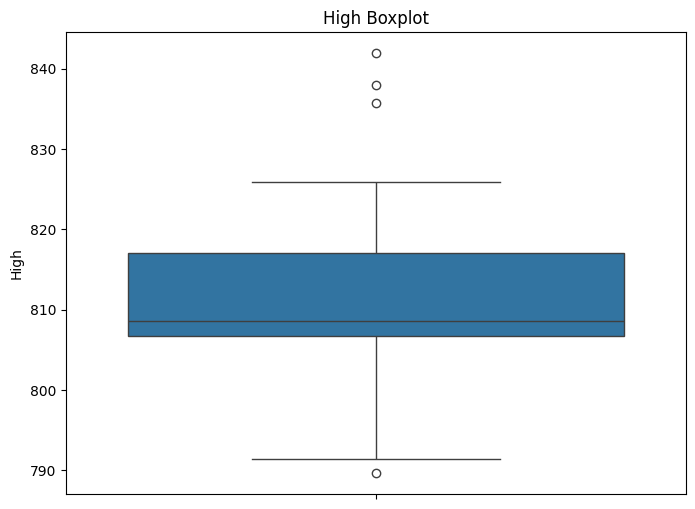

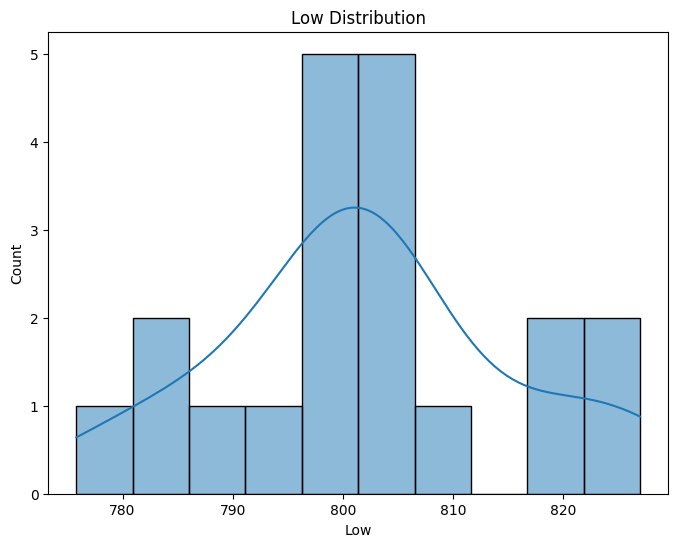

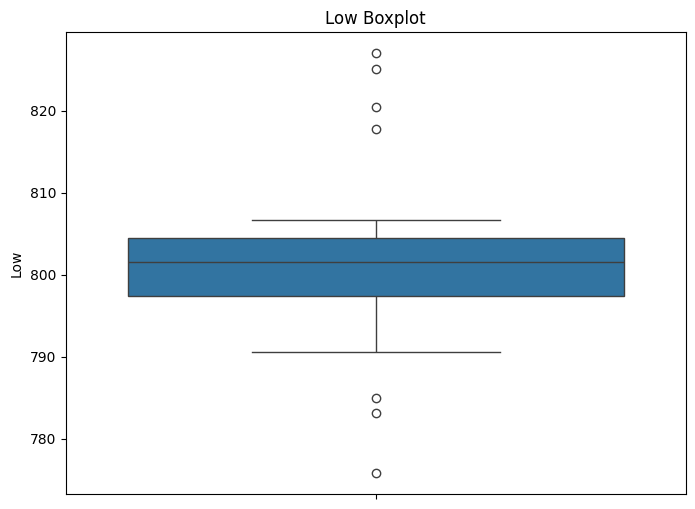

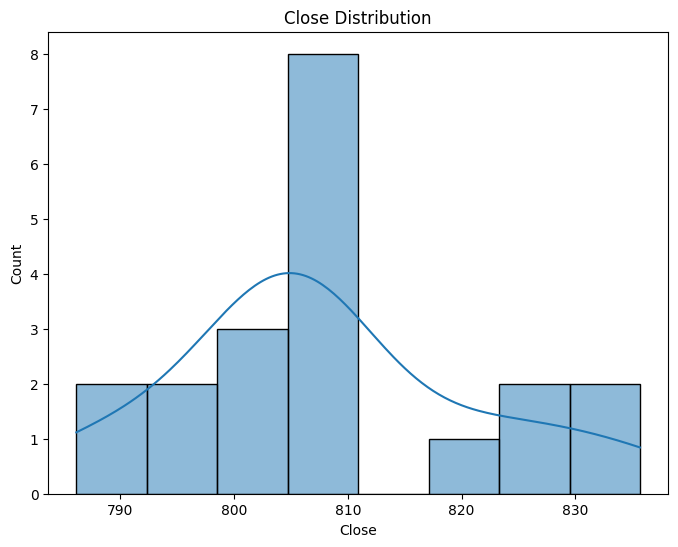

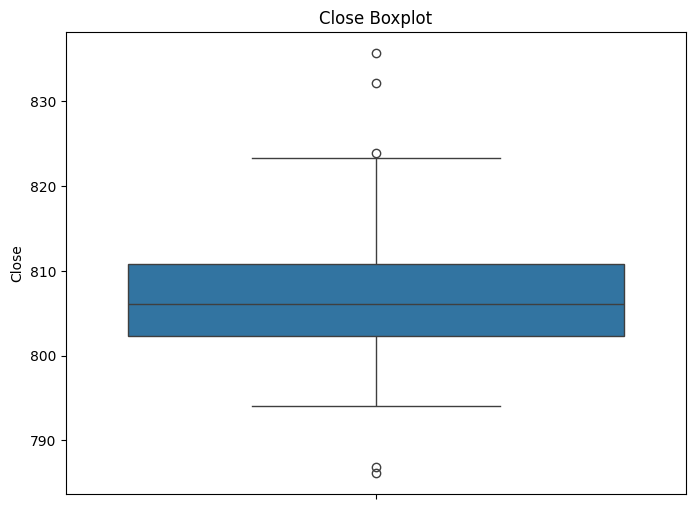

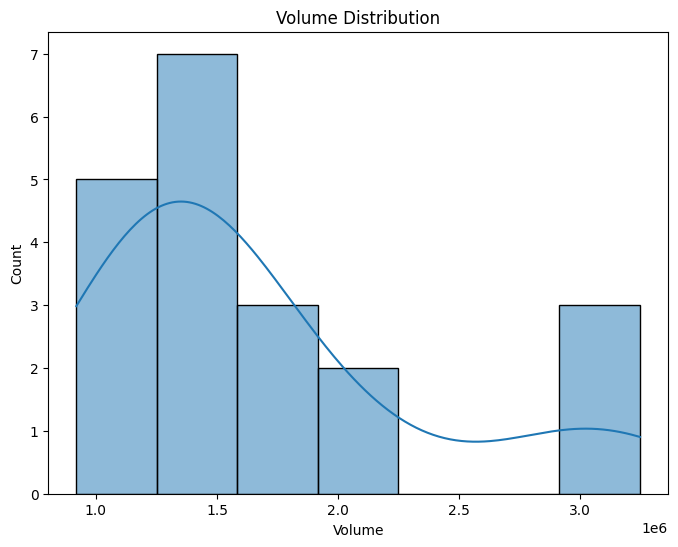

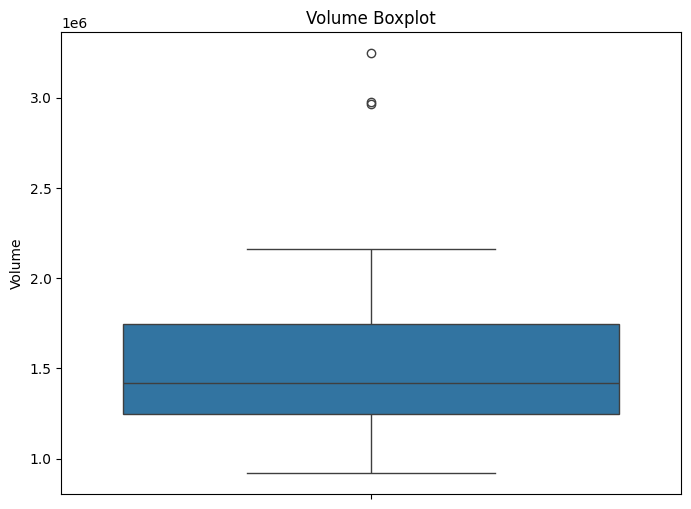

In [ ]:
data1 = pd.read_csv("/content/Google_Stock_Price_Test.csv")
data1['Date'] = pd.to_datetime(data1['Date']).astype('int64')
data1['Volume'] = data1['Volume'].str.replace(',', '').astype(float)
perform_eda(data1)